In [2]:
# Import dependencies
import torch
import torch.nn as nn
from plot_lib import set_default, show_scatterplot, plot_bases
import matplotlib.pyplot as plt
import random
import numpy as np

In [3]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [4]:
# Set up random seed to 1008. Do not change the random seed.
# Yes, these are all necessary when you run experiments!
seed = 1008
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

In [5]:
# Define data generating functions
def quadratic_data_generator(data_size):
    # f(x) = y = x^2 + 4x - 3
    # generate an input tensor of size data_size with torch.randn
    x = torch.randn(data_size, 1) - 2   
    x = x.to(device)
    y = x ** 2 + 4 * x - 3
    return x,y

def cubic_data_generator(data_size=100):
    # f(x) = y = x^3 + 4x^2 - 3
    # generate an input tensor of size data_size with torch.randn
    x = torch.randn(data_size, 1) - 2   
    x = x.to(device)
    y = x ** 3 + 4 * (x ** 2) - 3
    return x, y

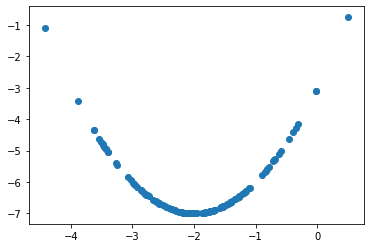

In [6]:
# Generate the data with 128 datapoints
x, y = quadratic_data_generator(128)
plt.scatter(x,y)
plt.show()

In [33]:
# Define a Linear Classifier with a single linear layer and no non-linearity
# (no hidden layer)
class Linear_0H(nn.Module):
    def __init__(self):
        super().__init__()

        self.classifier = nn.Sequential(
            nn.Linear(1, 1)
        )

    def forward(self, x):
        return self.classifier(x)

In [36]:
# Define a Linear Classifier with a single hidden layer of size 5 and ReLU non-linearity
class Linear_1H(nn.Module):
    def __init__(self):
        super().__init__()

        # TODO
        self.classifier = nn.Sequential(
            nn.Linear(1, 5),
            nn.ReLU(),
            nn.Linear(5, 1)
        )

    def forward(self, x):
        return self.classifier(x)

In [37]:
# Define a Linear Classifier with a two hidden layers of size 5 and ReLU non-linearity
class Linear_2H(nn.Module):
    def __init__(self):
        super().__init__()

        # TODO
        self.classifier = nn.Sequential(
            nn.Linear(1, 5),
            nn.ReLU(),
            nn.Linear(5, 5),
            nn.ReLU(),
            nn.Linear(5, 5),
            nn.ReLU(),
            nn.Linear(5, 1)
        )

    def forward(self, x):
        return self.classifier(x)

In [31]:
'''
TODO: Training function

Hint: look at some example pytorch tutorials to learn how to
    - initialize optimizers
    - zero gradient
    - backprop the loss
    - step the gradient


Note: This is full batch. We compute forward on whole x,y.
No need for dataloaders nor loop over batches. 
Just pass all of x to model's forward pass.
'''
def train(model, epochs, x, y):
    
    # Set model to training mode
    model.train()
    
    # Define MSE loss function
    criterion = torch.nn.MSELoss()
    
    # TODO: Define the SGD optimizer with learning rate 0.01
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    
    for epoch in range(epochs):
        
        # TODO: Forward data through model to predict y
        y_pred = model(x)
        
        # TODO: Compute loss in terms of predicted and true y
        loss = criterion(y_pred, y)

        # TODO: Zero gradient
        optimizer.zero_grad()
        
        # TODO: call backward on loss
        loss.backward()
        
        # TODO: step the optimizer
        optimizer.step()
        
        # every 100 epochs, print
        if (epoch+1) % 100 == 0:
            print('Epoch {} loss: {}'.format(epoch+1, loss.item()))
            
    # return y_pred without gradient information, for plotting
    return y_pred.detach()

Epoch 100 loss: 3.3841917514801025
Epoch 200 loss: 2.38427996635437
Epoch 300 loss: 1.8482362031936646
Epoch 400 loss: 1.5608686208724976
Epoch 500 loss: 1.4068135023117065
Epoch 600 loss: 1.3242257833480835
Epoch 700 loss: 1.2799509763717651
Epoch 800 loss: 1.2562156915664673
Epoch 900 loss: 1.243491291999817
Epoch 1000 loss: 1.236669898033142


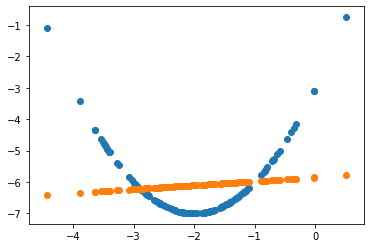

In [34]:
# 0H model on quadratic data
model = Linear_0H()
y_pred = train(model, epochs=1000, x=x, y=y)

# Plot predictions vs actual data
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

Epoch 100 loss: 2.0218899250030518
Epoch 200 loss: 1.24767005443573
Epoch 300 loss: 1.2289516925811768
Epoch 400 loss: 1.22878897190094
Epoch 500 loss: 1.2287873029708862
Epoch 600 loss: 1.2287871837615967
Epoch 700 loss: 1.2287871837615967
Epoch 800 loss: 1.2287871837615967
Epoch 900 loss: 1.2287871837615967
Epoch 1000 loss: 1.2287871837615967


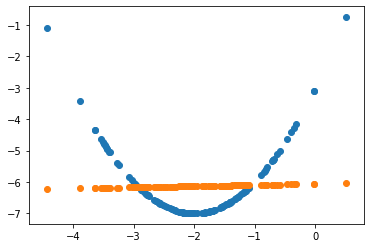

In [38]:
# 1H model on quadratic data
model = Linear_1H()
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

Epoch 100 loss: 1.2784205675125122
Epoch 200 loss: 1.0354541540145874
Epoch 300 loss: 0.6645718216896057
Epoch 400 loss: 0.33587217330932617
Epoch 500 loss: 0.23737822473049164
Epoch 600 loss: 0.23054292798042297
Epoch 700 loss: 0.3323044180870056
Epoch 800 loss: 0.2016439288854599
Epoch 900 loss: 0.28776562213897705
Epoch 1000 loss: 0.160337895154953


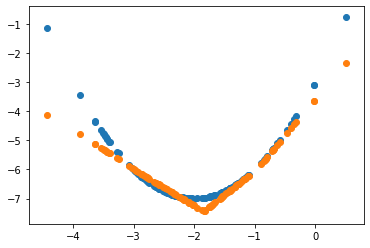

In [39]:
# 2H model on quadratic data
model = Linear_2H()
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

In [40]:
# Generate cubic data with 128 data points
x, y = cubic_data_generator(128)

Epoch 100 loss: 11.193708419799805
Epoch 200 loss: 11.012495994567871
Epoch 300 loss: 10.923691749572754
Epoch 400 loss: 10.880172729492188
Epoch 500 loss: 10.858845710754395
Epoch 600 loss: 10.848394393920898
Epoch 700 loss: 10.843274116516113
Epoch 800 loss: 10.840763092041016
Epoch 900 loss: 10.839534759521484
Epoch 1000 loss: 10.8389310836792


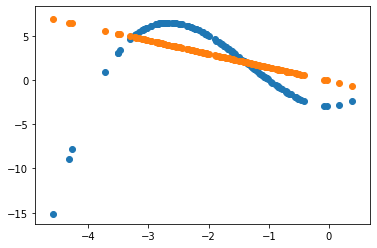

In [41]:
# 0H model on cubic data
model = Linear_0H()
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

Epoch 100 loss: 10.946550369262695
Epoch 200 loss: 10.878843307495117
Epoch 300 loss: 10.855002403259277
Epoch 400 loss: 10.847617149353027
Epoch 500 loss: 10.8451566696167
Epoch 600 loss: 10.844088554382324
Epoch 700 loss: 10.84350299835205
Epoch 800 loss: 10.843052864074707
Epoch 900 loss: 10.842679977416992
Epoch 1000 loss: 10.842371940612793


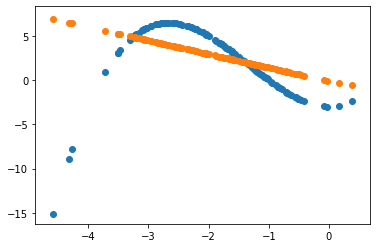

In [42]:
# 1H model on cubic data
model = Linear_1H()
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

Epoch 100 loss: 10.23365592956543
Epoch 200 loss: 6.841737270355225
Epoch 300 loss: 3.76893949508667
Epoch 400 loss: 3.3301198482513428
Epoch 500 loss: 0.3330429792404175
Epoch 600 loss: 0.2208479344844818
Epoch 700 loss: 0.3407149016857147
Epoch 800 loss: 0.17217488586902618
Epoch 900 loss: 0.39063385128974915
Epoch 1000 loss: 0.22193093597888947


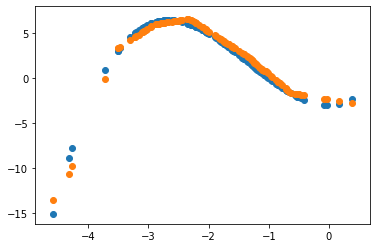

In [43]:
# 2H model on cubic data
model = Linear_2H()
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()